In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/train/combined_data.csv')
data

,accelerometer_x_mean,accelerometer_x_std,accelerometer_x_mean_abs_dev,accelerometer_x_minval,accelerometer_x_maxval,accelerometer_x_median,accelerometer_x_median_abs_dev,accelerometer_x_iqr,accelerometer_x_neg_count,accelerometer_x_pos_count,...,totalAcceleration_z_magnitude,class,mean_roll,mean_pitch,mean_yaw,mean_loudness,latitude,longitude,altitude,avg_speed
0,-0.000360,0.001389,0.001095,-0.004630,0.002062,-0.000133,0.000897,0.001774,83,67,...,0,Home,0.019068,0.024733,1.100247,-144.593148,40.384837,-86.915463,160.099991,0.166377
1,0.000077,0.001281,0.000985,-0.003197,0.004447,0.000133,0.000800,0.001682,64,86,...,0,Home,0.019185,0.024596,1.100067,-133.916111,40.384837,-86.915473,160.099991,0.017980
2,-0.000008,0.001122,0.000836,-0.003197,0.004447,-0.000044,0.000632,0.001257,78,72,...,0,Home,0.019413,0.024274,1.099534,-131.561944,40.384839,-86.915478,160.099991,0.012149
3,-0.000306,0.000890,0.000702,-0.002655,0.002262,-0.000316,0.000638,0.001237,98,52,...,0,Home,0.019428,0.024050,1.098634,-139.501759,40.384852,-86.915480,160.099991,0.027908
4,-0.000309,0.001160,0.000910,-0.004027,0.003065,-0.000417,0.000777,0.001507,95,55,...,0,Home,0.019343,0.023987,1.097990,-134.945000,40.384855,-86.915481,160.099991,0.024495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.002859,0.193675,0.125134,-0.690119,0.698721,-0.004180,0.068237,0.135110,79,71,...,0,Drive,-0.021712,0.018651,0.944217,-22.696481,40.403319,-86.920427,159.399994,16.908133
107,0.000368,0.002026,0.001081,-0.019186,0.006373,0.000460,0.000793,0.001570,62,88,...,0,Classroom,0.002867,0.023064,2.437325,-97.688981,40.427983,-86.911015,149.399994,0.054280
108,0.000009,0.001584,0.001161,-0.004812,0.004652,-0.000013,0.000844,0.001650,76,74,...,0,Classroom,0.001074,0.025703,2.450282,-101.085463,40.427989,-86.911012,149.399994,0.029892
109,-0.000092,0.002038,0.001471,-0.005484,0.008432,-0.000070,0.001097,0.002158,81,69,...,0,Classroom,0.000262,0.027192,2.446066,-103.619167,40.427989,-86.911012,149.399994,0.034508


In [3]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['class'] = LE.fit_transform(data['class'])

d:\Anaconda\envs\MDL2\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


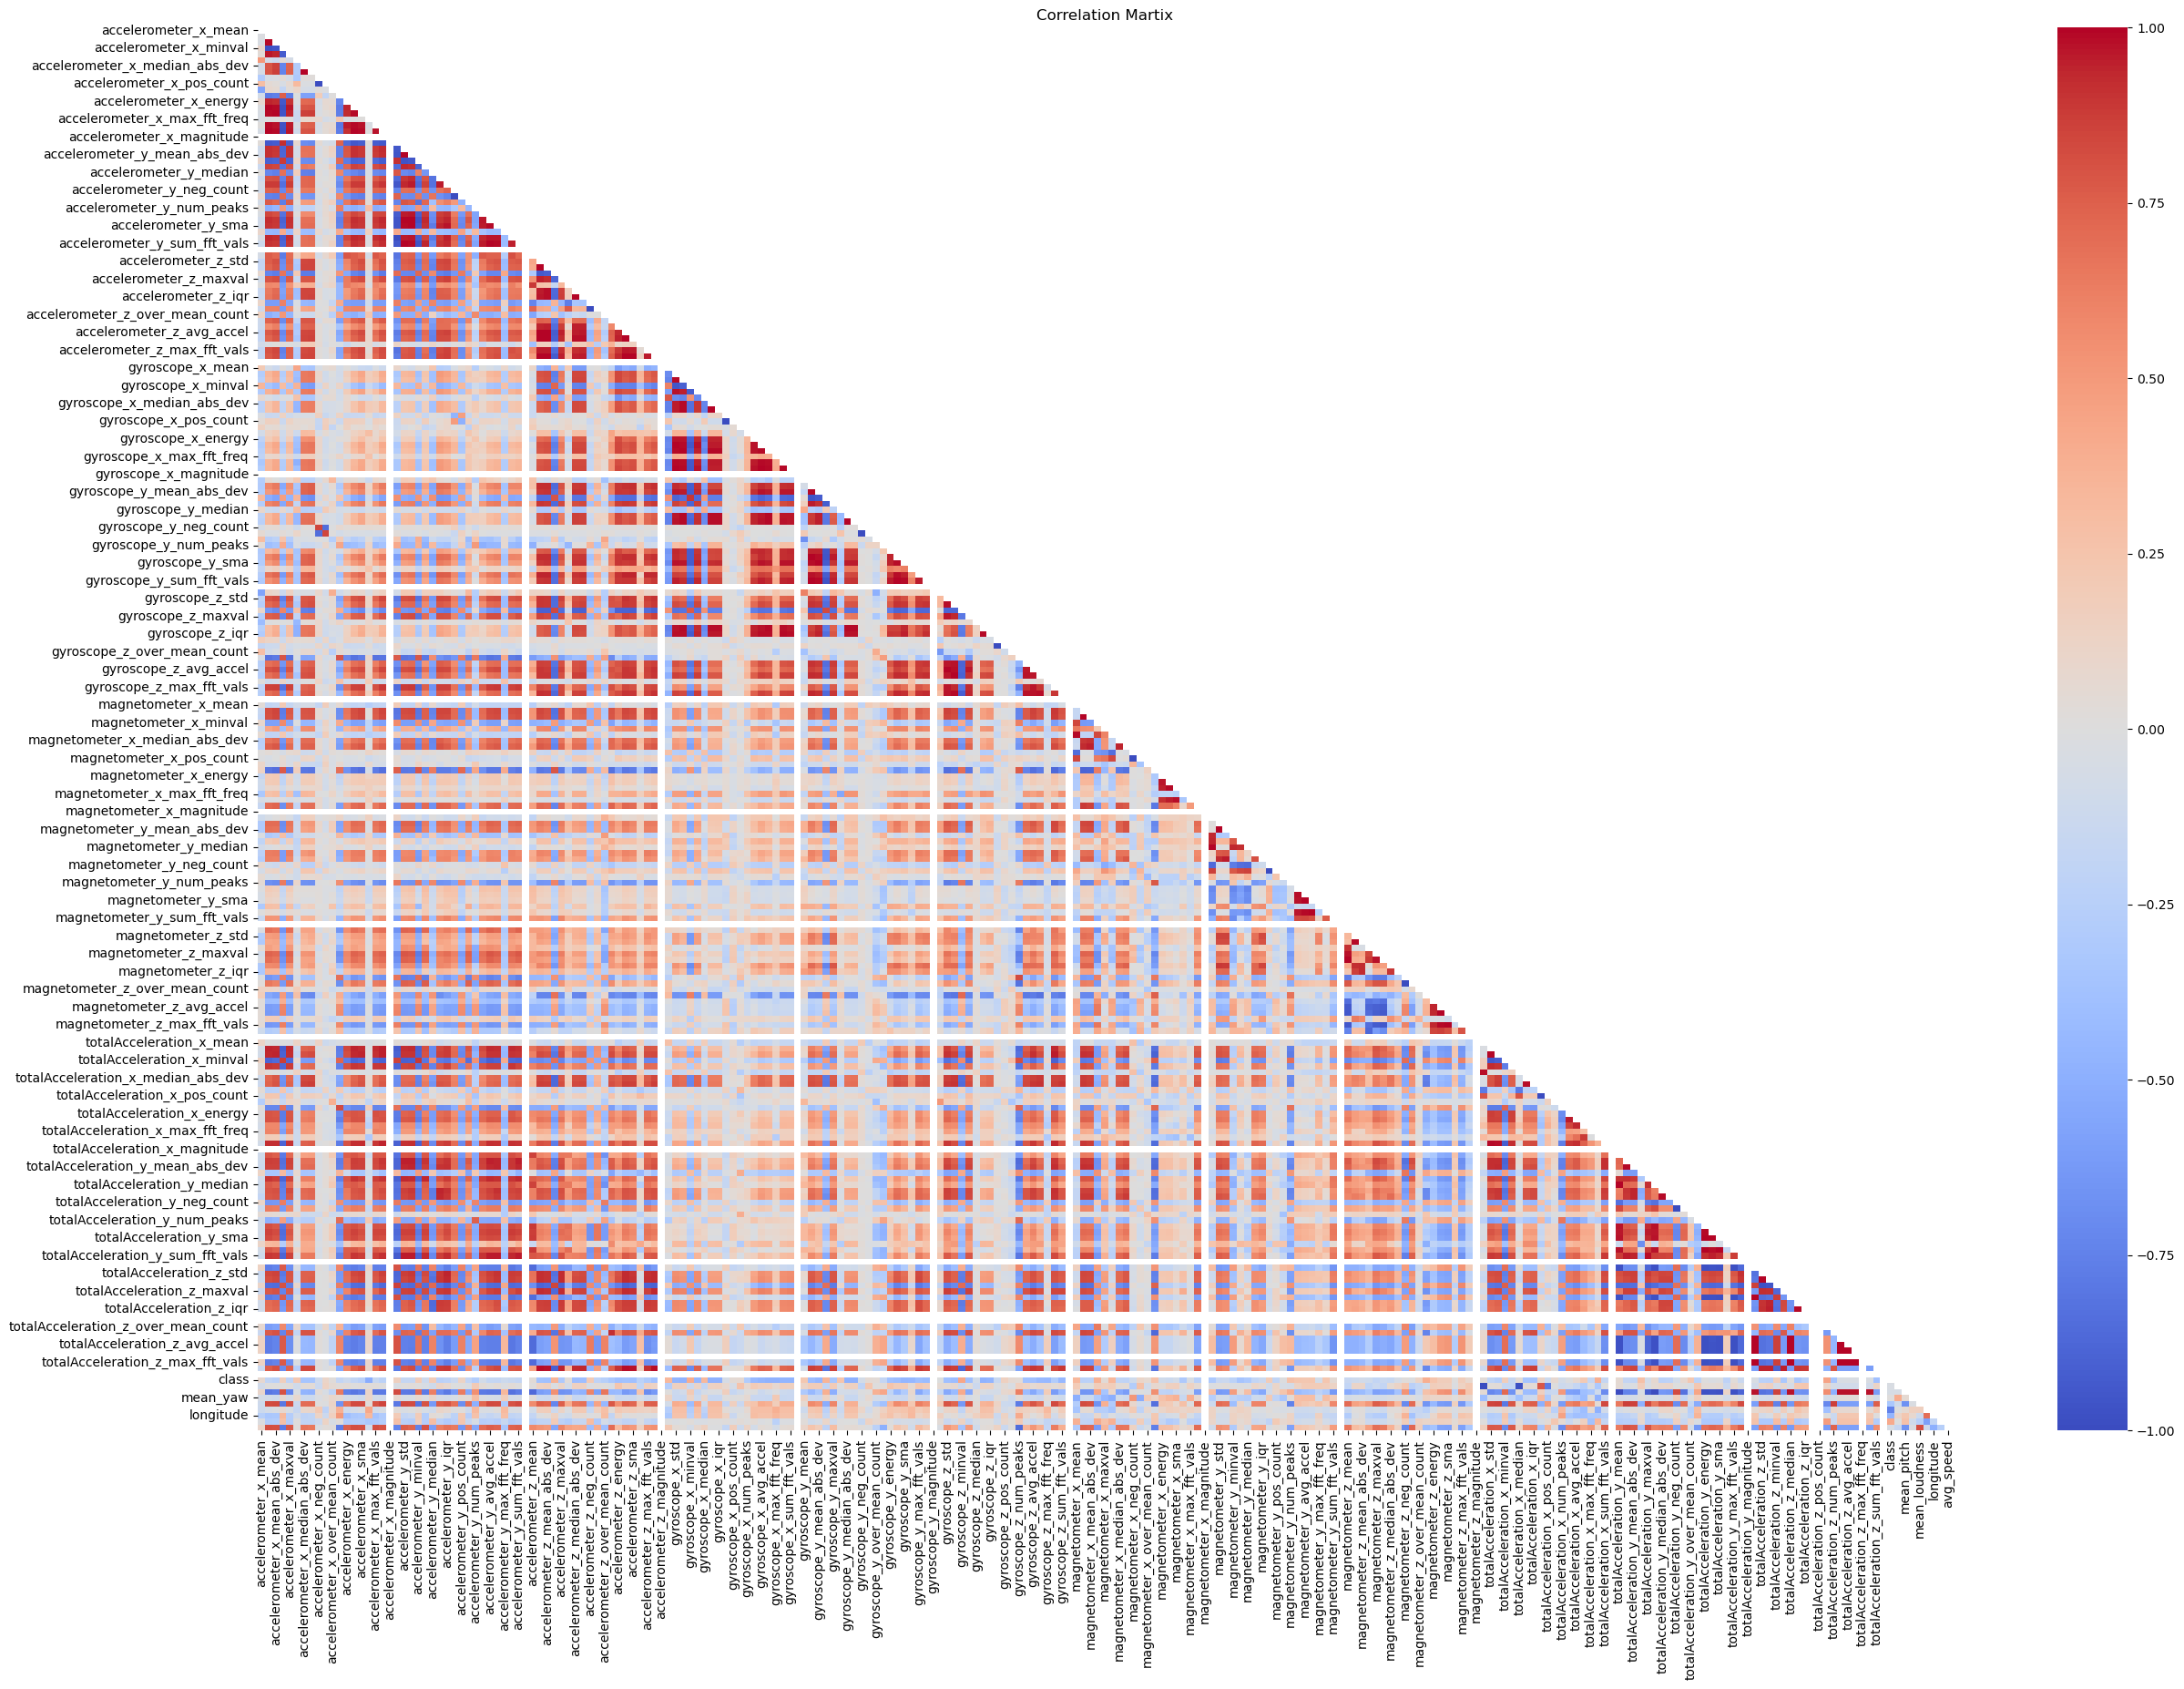

In [4]:
# correlation matrix for feature selection
c = data.corr()
mask = np.triu(np.ones_like(c, dtype=bool))

plt.figure(figsize=(30, 20))
sns.heatmap(c, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Correlation Martix')
plt.show()

In [5]:
print(data['class'].value_counts())
print('Shape: ', data.shape)
print('We need', data.shape[0] * 20/100, 'datapoints for an 80/20 split')
print('We need', data.shape[0] * 30/100, 'datapoints for an 70/30 split')
print('For an evenly balanced test set, we need', round((data.shape[0] * 20/100) / 5, 2), 'or', round((data.shape[0] * 30/100) / 5, 2), 'datapoints per class')

class
4    33
1    29
2    28
3    13
0     8
Name: count, dtype: int64
Shape:  (111, 237)
We need 22.2 datapoints for an 80/20 split
We need 33.3 datapoints for an 70/30 split
For an evenly balanced test set, we need 4.44 or 6.66 datapoints per class


In [8]:
Y = data[['class']]
X = data.drop(['class'], axis=1)

In [9]:
X

,accelerometer_x_mean,accelerometer_x_std,accelerometer_x_mean_abs_dev,accelerometer_x_minval,accelerometer_x_maxval,accelerometer_x_median,accelerometer_x_median_abs_dev,accelerometer_x_iqr,accelerometer_x_neg_count,accelerometer_x_pos_count,...,totalAcceleration_z_sum_fft_vals,totalAcceleration_z_magnitude,mean_roll,mean_pitch,mean_yaw,mean_loudness,latitude,longitude,altitude,avg_speed
0,-0.000360,0.001389,0.001095,-0.004630,0.002062,-0.000133,0.000897,0.001774,83,67,...,1501.120347,0,0.019068,0.024733,1.100247,-144.593148,40.384837,-86.915463,160.099991,0.166377
1,0.000077,0.001281,0.000985,-0.003197,0.004447,0.000133,0.000800,0.001682,64,86,...,1501.742226,0,0.019185,0.024596,1.100067,-133.916111,40.384837,-86.915473,160.099991,0.017980
2,-0.000008,0.001122,0.000836,-0.003197,0.004447,-0.000044,0.000632,0.001257,78,72,...,1498.390160,0,0.019413,0.024274,1.099534,-131.561944,40.384839,-86.915478,160.099991,0.012149
3,-0.000306,0.000890,0.000702,-0.002655,0.002262,-0.000316,0.000638,0.001237,98,52,...,1500.719696,0,0.019428,0.024050,1.098634,-139.501759,40.384852,-86.915480,160.099991,0.027908
4,-0.000309,0.001160,0.000910,-0.004027,0.003065,-0.000417,0.000777,0.001507,95,55,...,1500.880852,0,0.019343,0.023987,1.097990,-134.945000,40.384855,-86.915481,160.099991,0.024495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.002859,0.193675,0.125134,-0.690119,0.698721,-0.004180,0.068237,0.135110,79,71,...,1566.310498,0,-0.021712,0.018651,0.944217,-22.696481,40.403319,-86.920427,159.399994,16.908133
107,0.000368,0.002026,0.001081,-0.019186,0.006373,0.000460,0.000793,0.001570,62,88,...,1504.071955,0,0.002867,0.023064,2.437325,-97.688981,40.427983,-86.911015,149.399994,0.054280
108,0.000009,0.001584,0.001161,-0.004812,0.004652,-0.000013,0.000844,0.001650,76,74,...,1503.577551,0,0.001074,0.025703,2.450282,-101.085463,40.427989,-86.911012,149.399994,0.029892
109,-0.000092,0.002038,0.001471,-0.005484,0.008432,-0.000070,0.001097,0.002158,81,69,...,1503.167564,0,0.000262,0.027192,2.446066,-103.619167,40.427989,-86.911012,149.399994,0.034508


In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split